# Training a two-layer neural network using Social Spider Optimization (SSO)

In this notebook, we use features that have been extracted from X-Ray images using a convolutional neural network where each image would be represented by a features vector of shape (3 * 3 * 256).  Features are fed into a two-layer neural network to train it using Social Spider Optimizer to detect whether an image has Pneumonia or not.

### Importing libraries

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from six.moves import cPickle as pickle
import seaborn as sns
from NN.SSO_NN import SSO_NN

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 700

### Loading training data

In [4]:
pickle_file = 'x_ray_train.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  features = save['features']
  labels = save['labels']
  del save  # hint to help gc free up memory
  print('features ', features.shape)
  print('labels ', labels.shape)

features  (5756, 3, 3, 256)
labels  (5756, 2)


In [5]:
features = np.reshape(features, (5756, 3 * 3 * 256))
features.shape

(5756, 2304)

In [6]:
labels[0]

array([0., 1.])

### Convert labels from one-hot encoding to integer encoding

In [7]:
y = []
for i in range(5756):
    if labels[i][0] == 1:
        y.append(0)
    if labels[i][1] == 1:
        y.append(1)
y = np.asarray(y)

In [6]:
y.shape

(5756,)

### Displaying class distribution

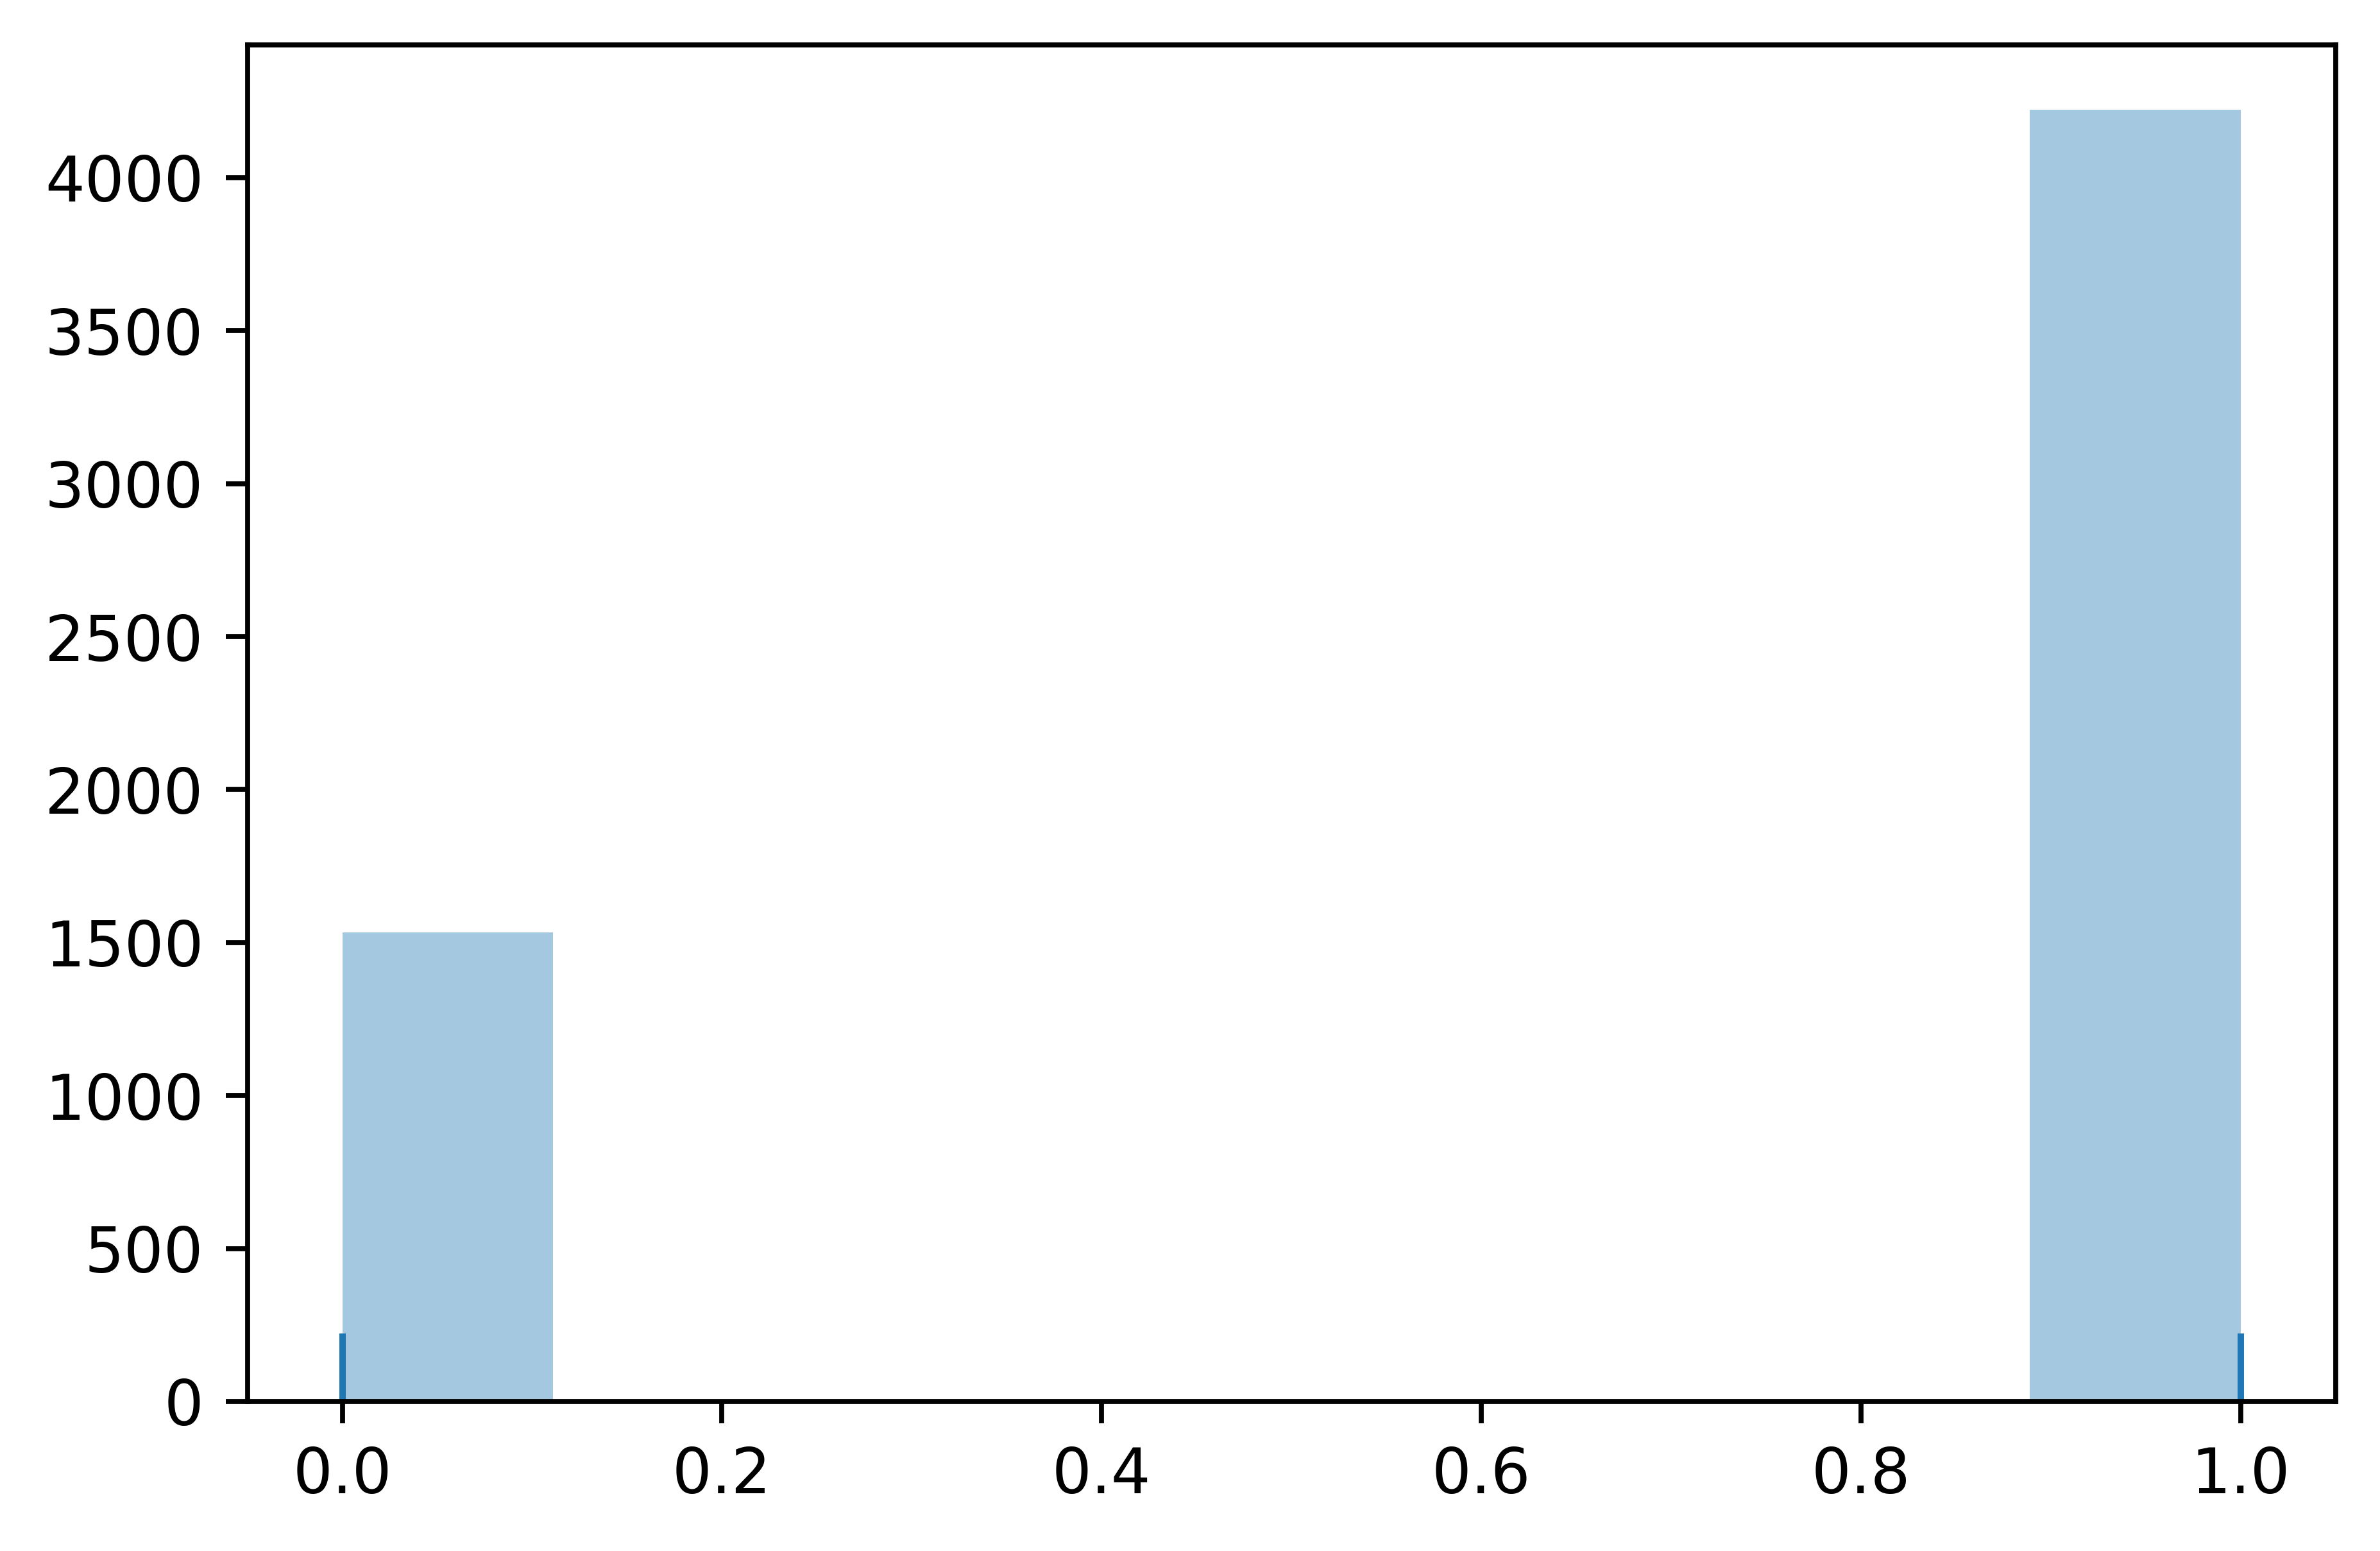

In [10]:
sns.distplot(y, kde=False, rug=True);

### Training the model

In [7]:
input_size = 2304
hidden_siz = 16
output_size = 2
max_iteration = 10000
pop_size = 20
std = 1e-3       
soo = SSO_NN(input_size, hidden_siz, output_size, pop_size, std, reg = 0.05, r_a = 1, p_c = 0.7, p_m = 0.1)
solution = soo.train(features, y, max_iteration, True)

               SSA starts at 2020-05-20 09:11:00
 iter optimum_loss optimum_acc  pop_min  base_dist  mean_dist time_elapsed
    1 6.9480e-01 7.3367e-01 6.9480e-01 9.6188e-04 3.9566e+01 00:00:00.501
   10 6.9476e-01 7.3367e-01 6.9483e-01 9.5881e-04 3.9281e+01 00:00:05.609
  100 6.8790e-01 7.3367e-01 6.8792e-01 8.2403e-04 3.3053e+01 00:00:59.110
  200 6.4480e-01 7.3367e-01 6.5765e-01 7.8129e-04 3.0915e+01 00:01:59.348
  300 5.8165e-01 7.3367e-01 5.8171e-01 7.5316e-04 2.9419e+01 00:03:00.873
  400 5.8102e-01 7.3367e-01 5.8104e-01 7.0952e-04 2.7693e+01 00:04:01.880
  500 5.8081e-01 7.3367e-01 5.8087e-01 5.9595e-04 2.3398e+01 00:05:02.180
  600 5.8034e-01 7.3367e-01 5.8034e-01 5.1157e-04 2.0173e+01 00:06:01.962
  700 5.7874e-01 7.3367e-01 5.7901e-01 4.8550e-04 1.9102e+01 00:06:57.749
  800 5.6982e-01 7.3367e-01 5.6998e-01 5.2582e-04 2.0473e+01 00:07:53.868
  900 5.3832e-01 7.3367e-01 5.3832e-01 6.4241e-04 2.4847e+01 00:08:54.598
 1000 5.0981e-01 7.3367e-01 5.1091e-01 7.6657e-04 2.9707e+01 0

### Displaying curves of loss and accuracy during training

In [31]:
losses = np.asarray([6.9480e-01, 
6.9476e-01, 
6.8790e-01, 
6.4480e-01, 
5.8165e-01, 
5.8102e-01, 
5.8081e-01, 
5.8034e-01, 
5.7874e-01, 
5.6982e-01, 
5.3832e-01, 
5.0981e-01, 
3.0781e-01, 
2.4796e-01, 
2.2916e-01, 
2.1893e-01, 
2.1203e-01, 
2.0684e-01, 
2.0329e-01, 
1.9997e-01, 
1.9735e-01])
accuracies = np.asarray([7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
7.3367e-01,
9.2356e-01,
9.4753e-01,
9.5448e-01,
9.5709e-01,
9.5865e-01,
9.6143e-01,
9.6247e-01,
9.6265e-01,
9.6438e-01])

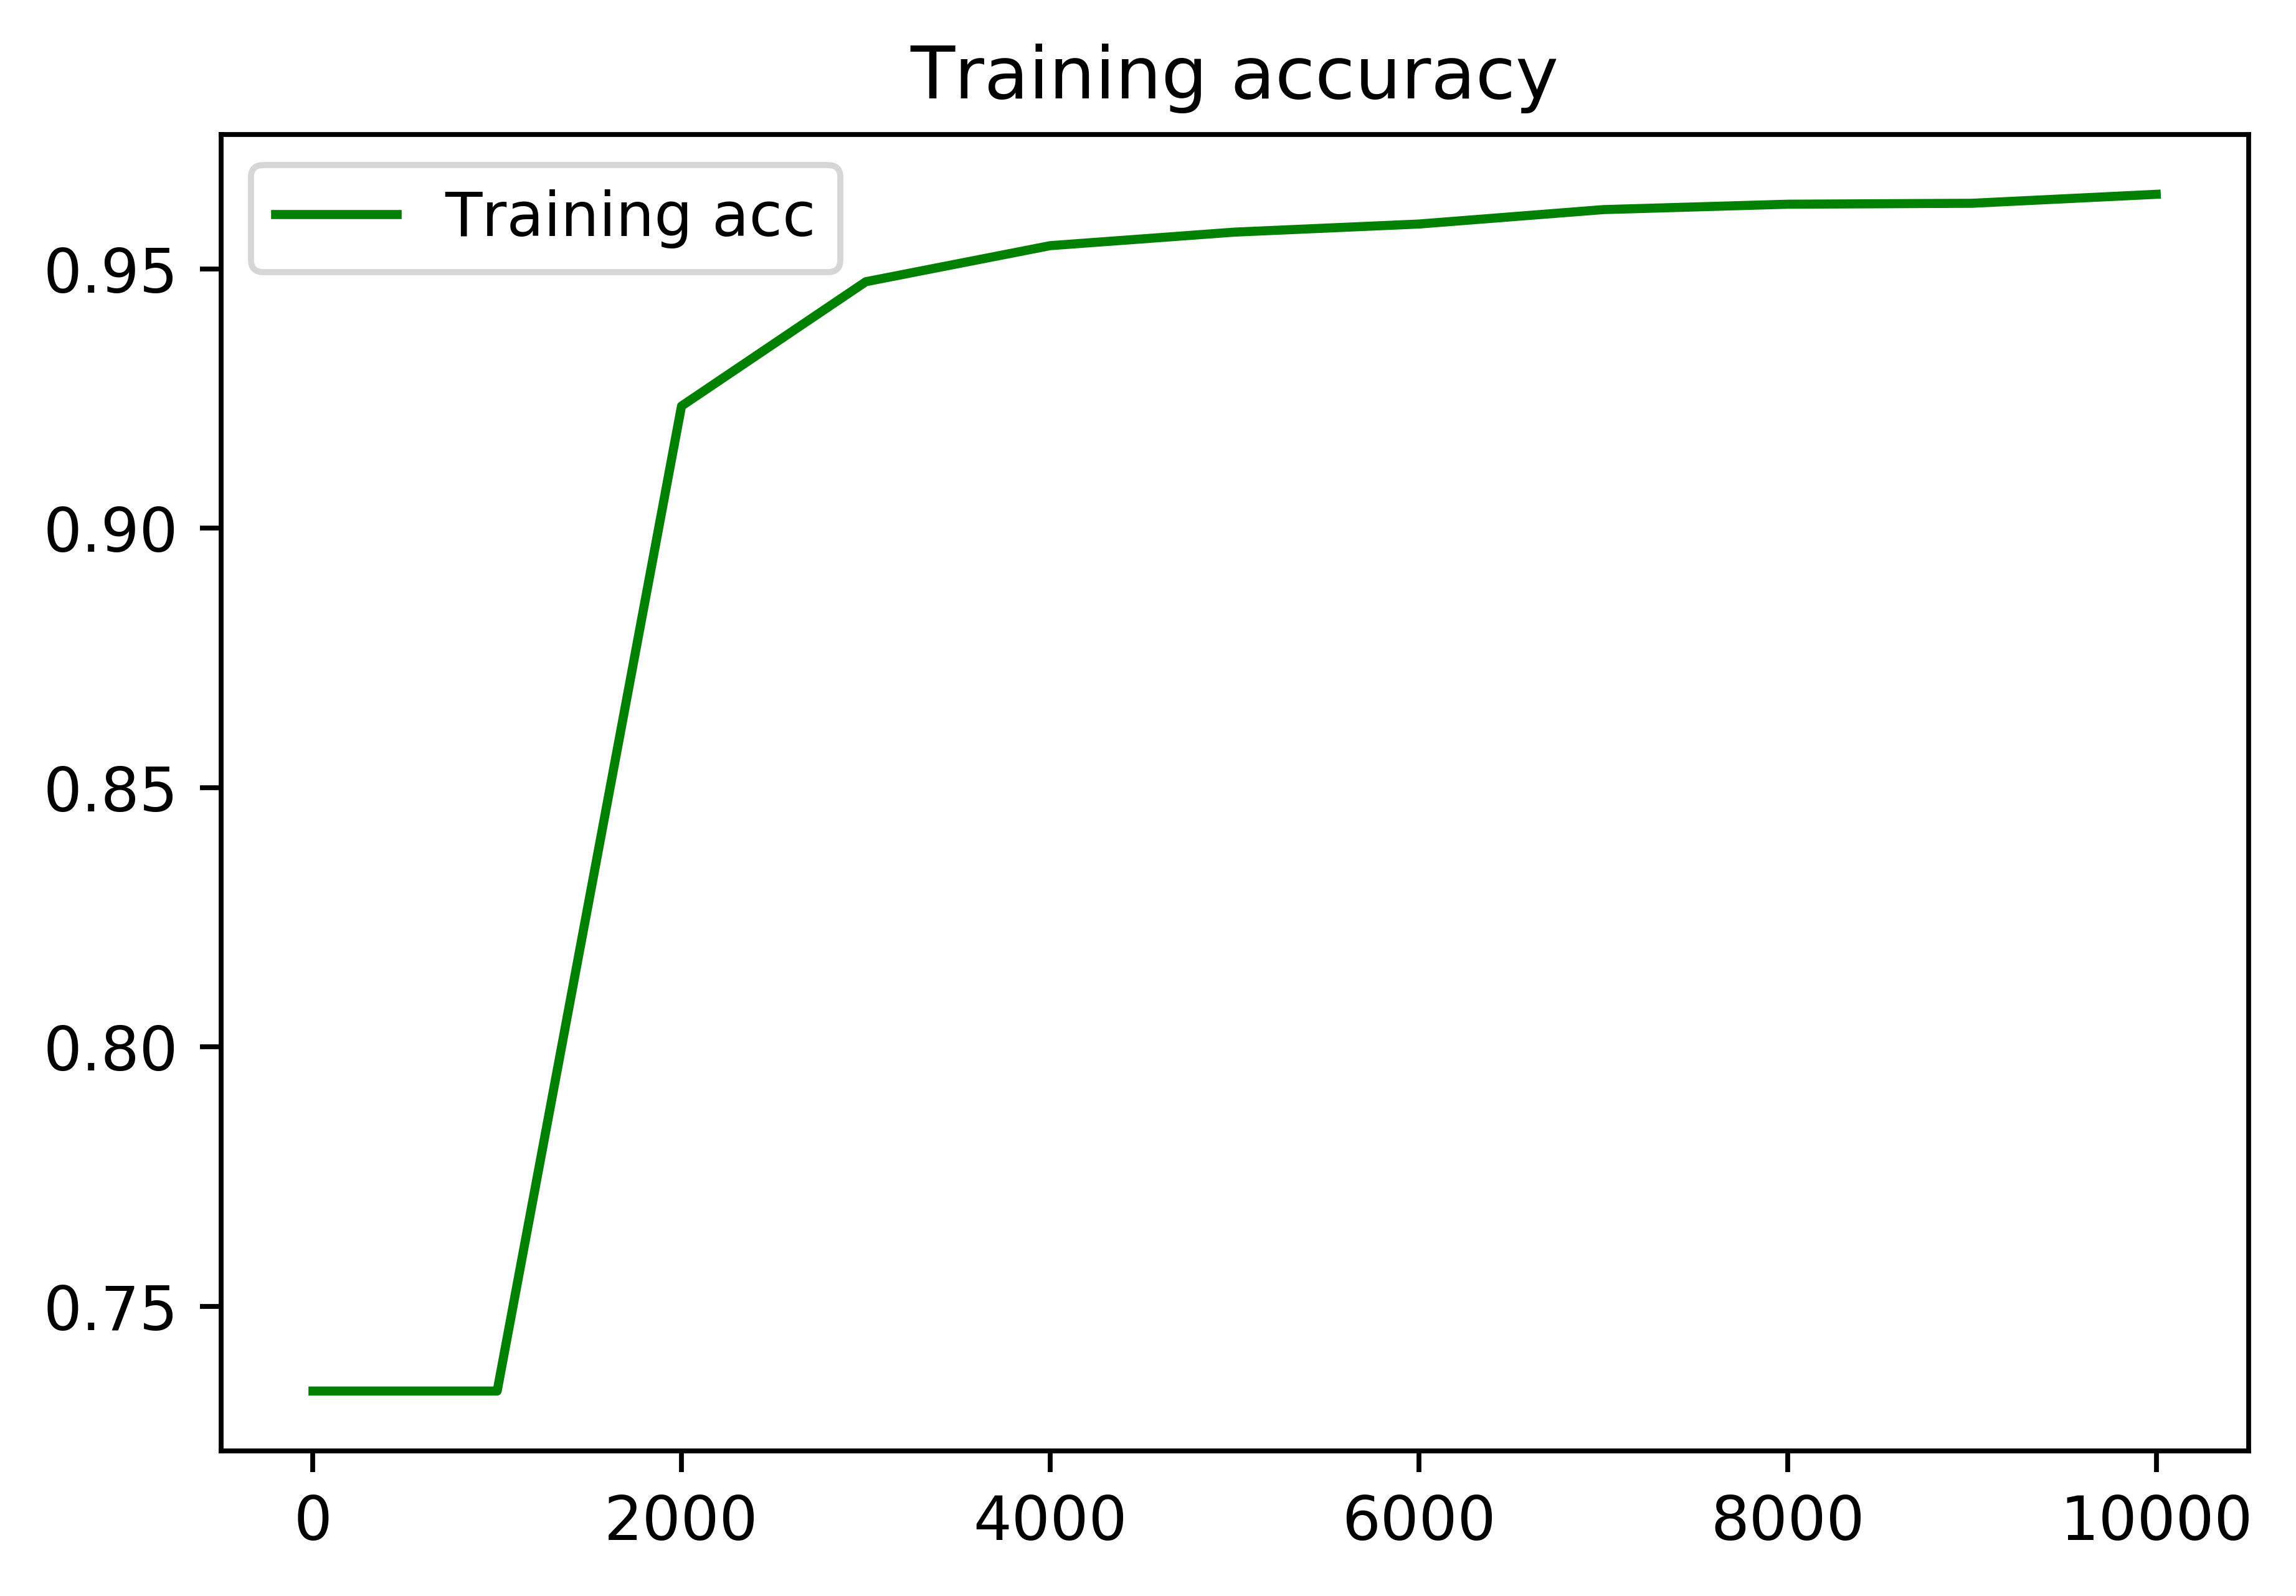

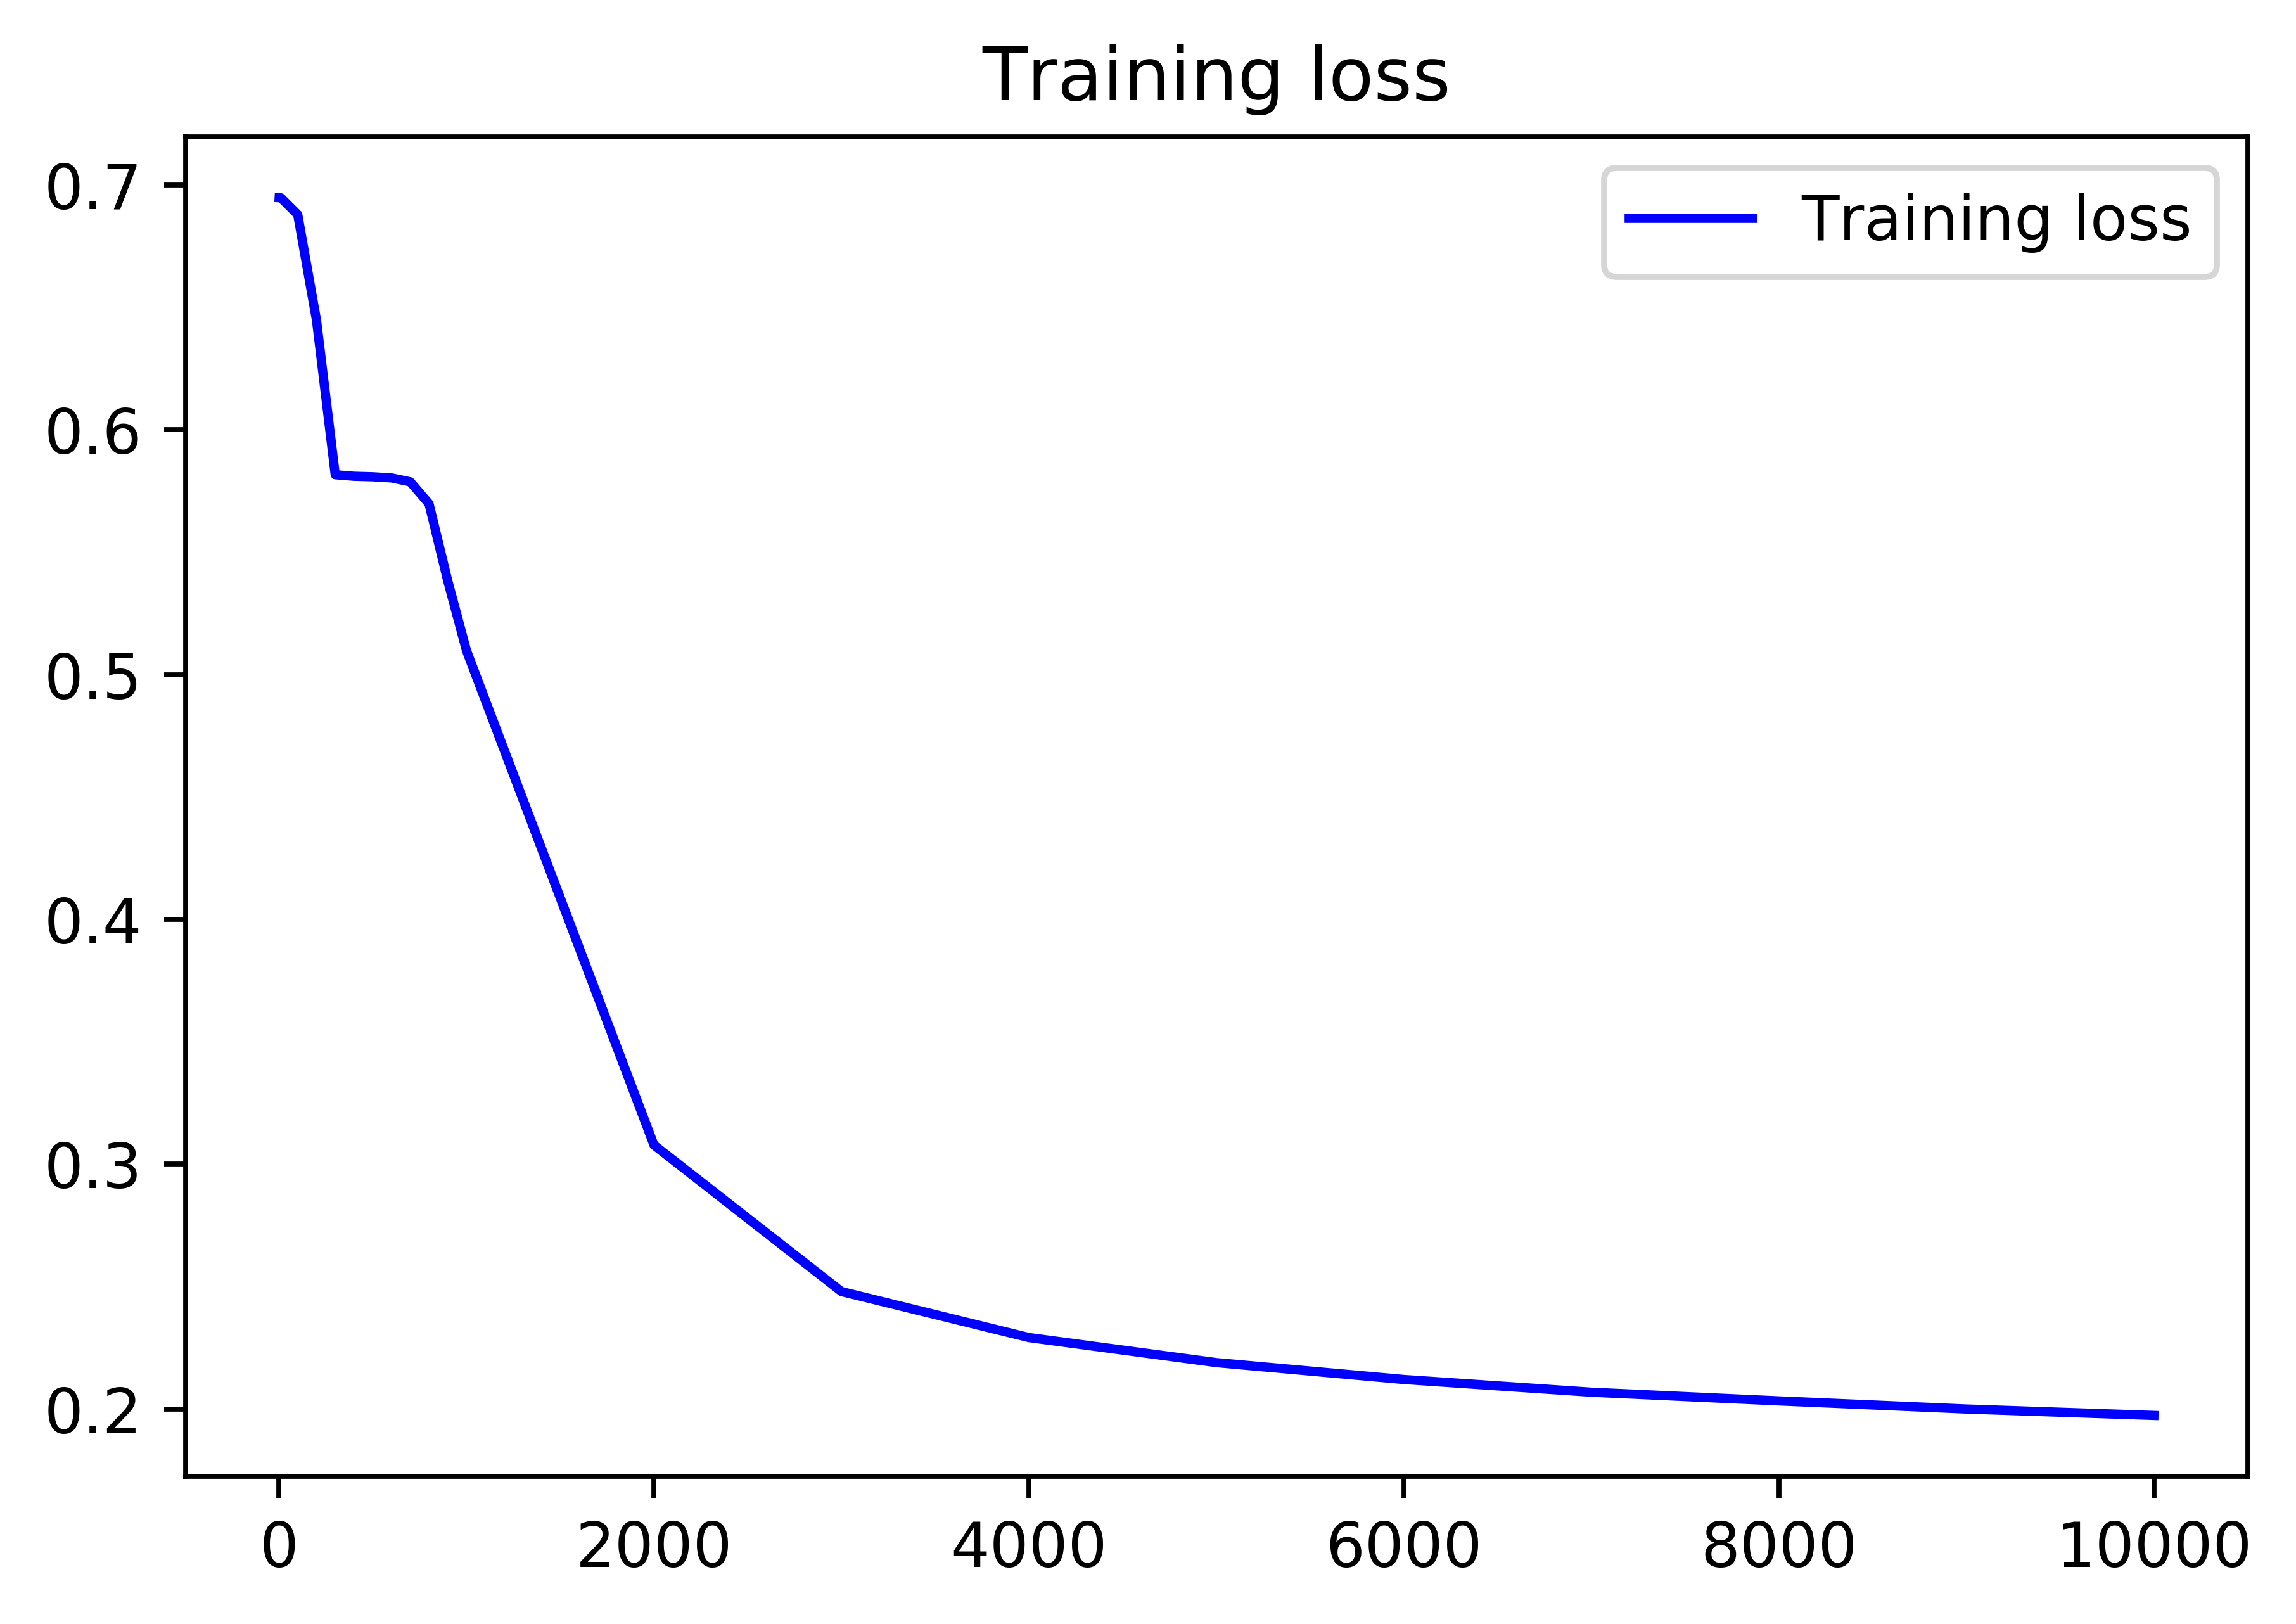

In [32]:
iterations = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
plt.plot(iterations, accuracies, 'g', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(iterations, losses, 'b', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

### Displaying confusion matrix for the training data

In [26]:
hidden_layer = np.maximum(0, np.dot(features, w1) + b1) # note, ReLU activation
scores = np.maximum(0, np.dot(hidden_layer, w2) + b2)
predicted_class = np.argmax(scores, axis=1)

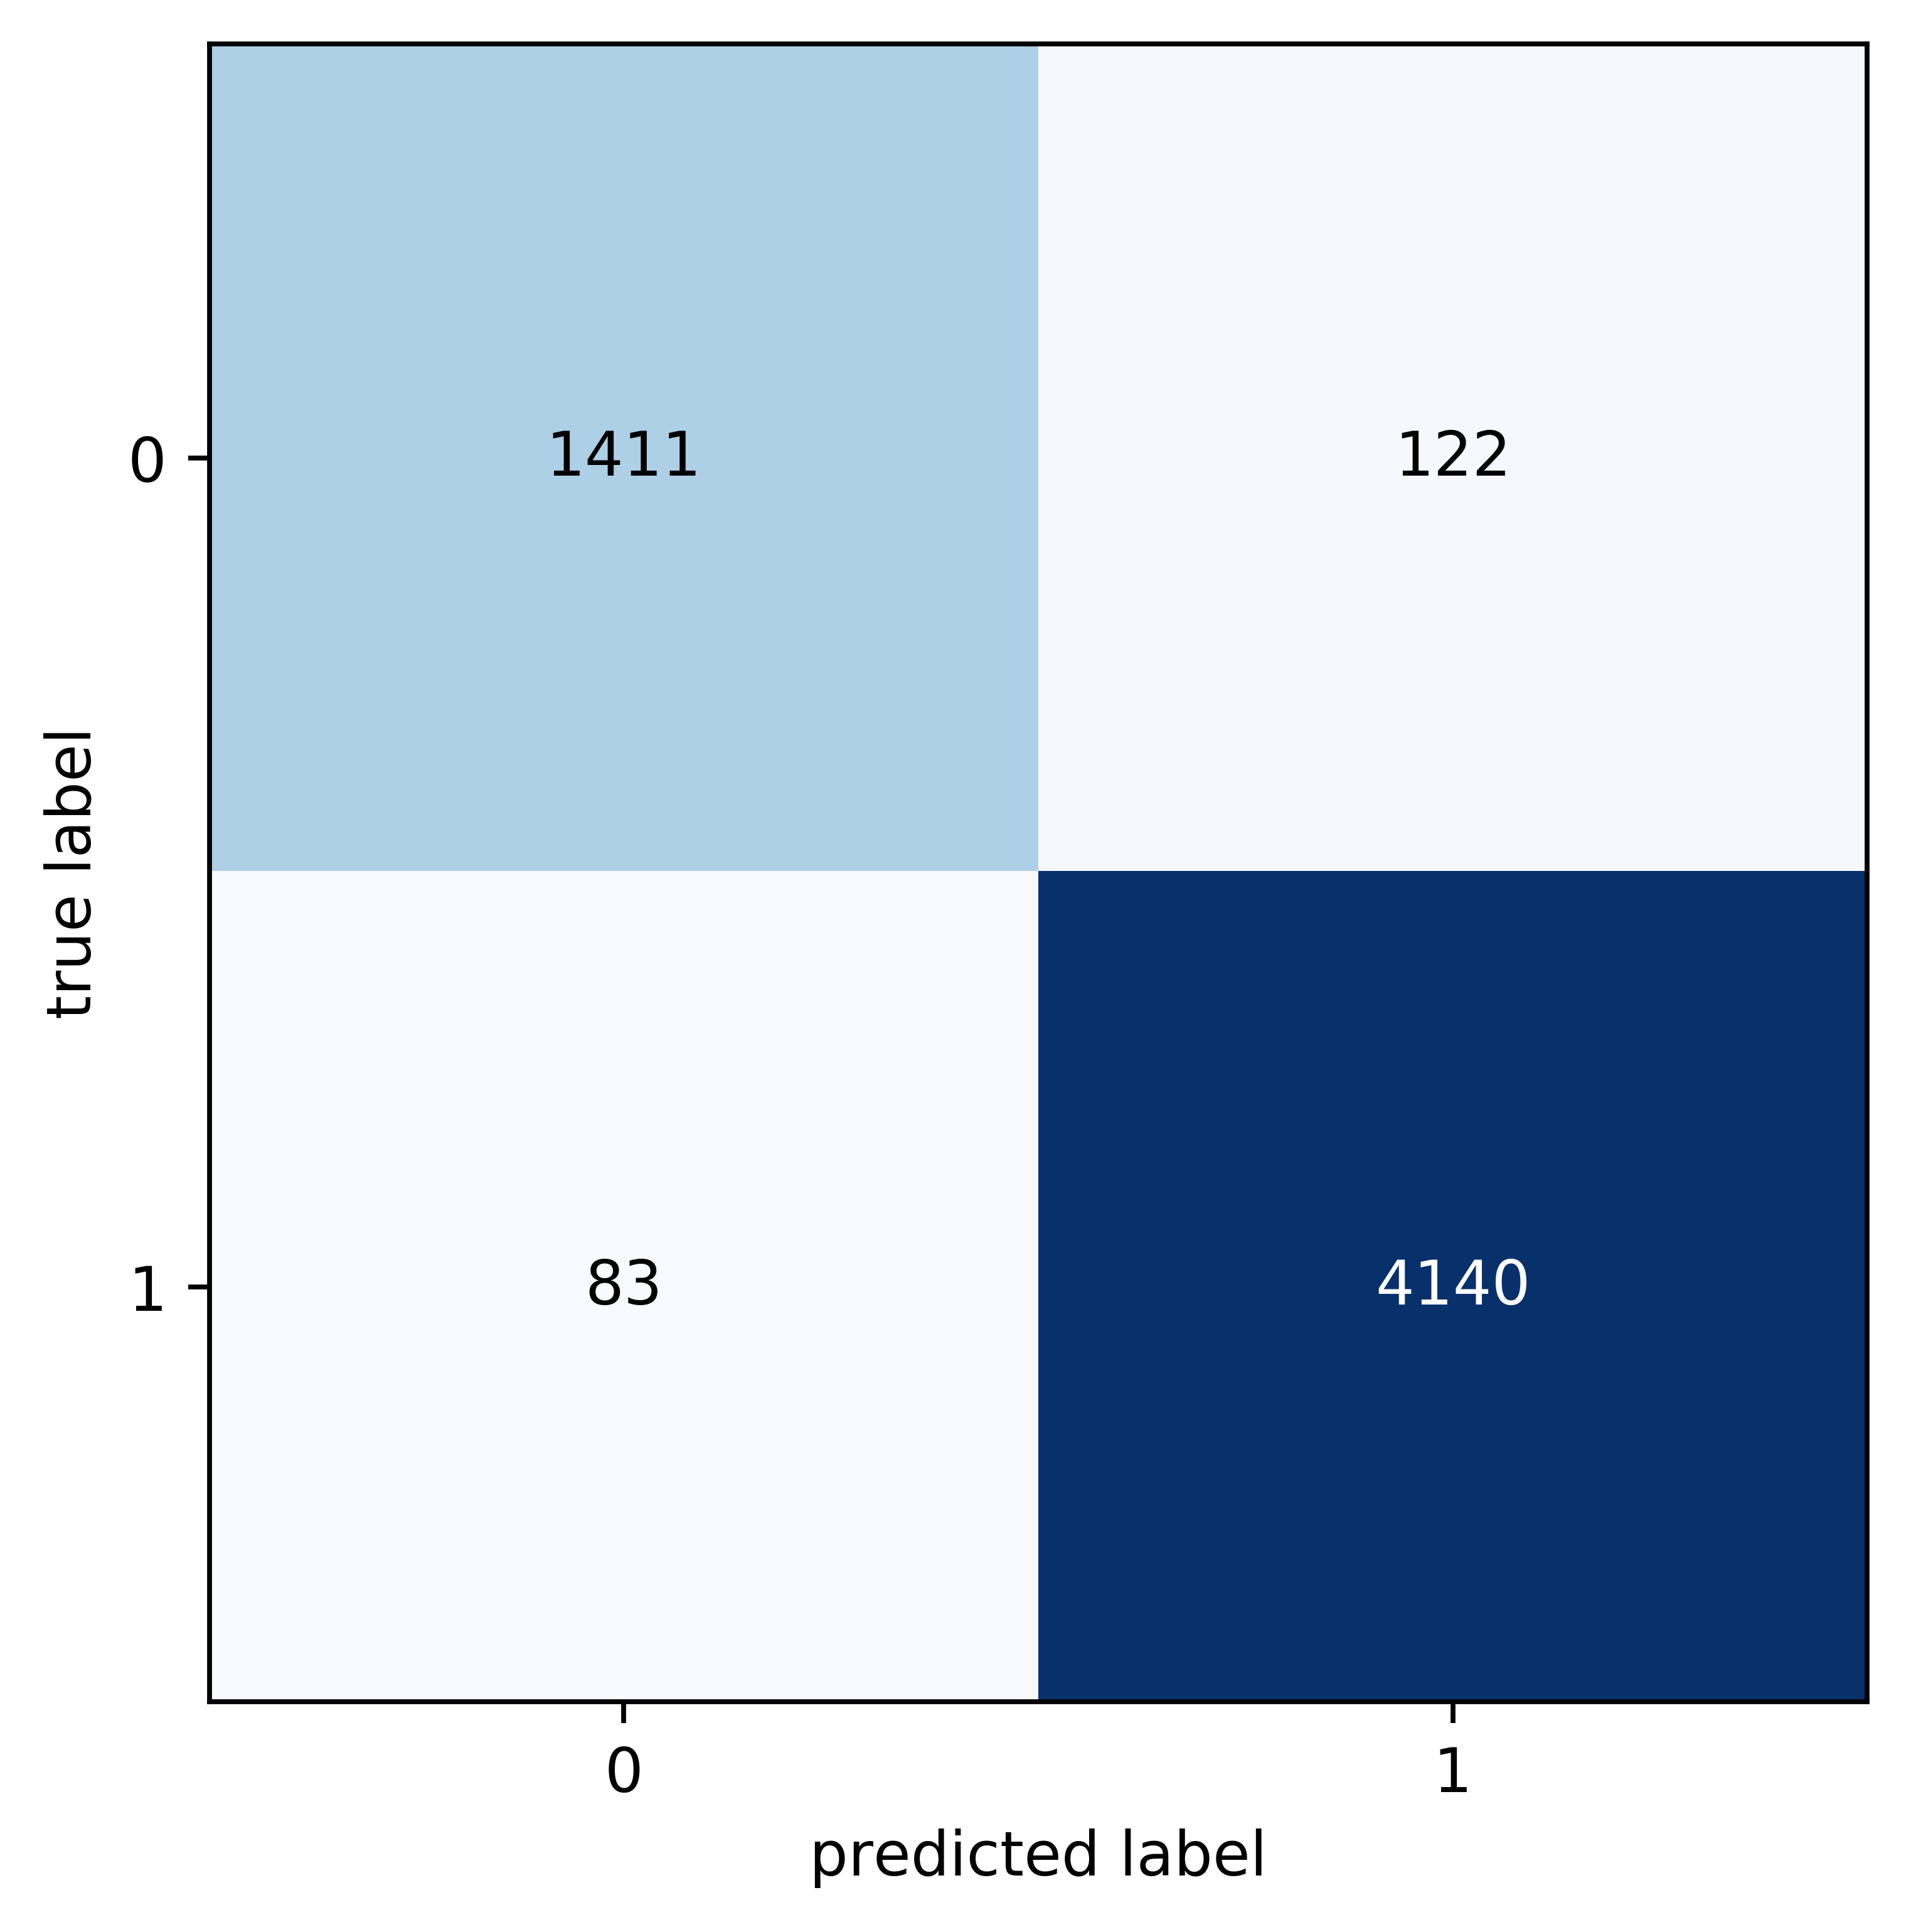

In [27]:
CM = confusion_matrix(y, predicted_class)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### precision = True Positive / (True Positive + False Positive)
### recall = True Positive / (True Positive + False Negative)

In [1]:
#Recall
4140/(4140+83)

0.980345725787355

In [3]:
#Precision
4140/(4140+122)

0.9713749413420929

### Loading testing data

In [8]:
#Loading data
pickle_file = 'x_ray_val.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  val_features = save['features']
  val_labels = save['labels']
  del save  # hint to help gc free up memory
  print('features ', val_features.shape)
  print('labels ', val_labels.shape)

features  (100, 3, 3, 256)
labels  (100, 2)


### Displaying confusion matrix for testing data

In [9]:
val_features = np.reshape(val_features, (100, 3 * 3 * 256))
val_features.shape

(100, 2304)

In [13]:
val_y = []
for i in range(100):
    if val_labels[i][0] == 1:
        val_y.append(0)
    if val_labels[i][1] == 1:
        val_y.append(1)
val_y = np.asarray(val_y)

In [14]:
val_y.shape

(100,)

In [16]:
w1 = solution['W1']
w2 = solution['W2']
b1 = solution['b1']
b2 = solution['b2']

hidden_layer = np.maximum(0, np.dot(val_features, w1) + b1) # note, ReLU activation
scores = np.maximum(0, np.dot(hidden_layer, w2) + b2)
predicted_class = np.argmax(scores, axis=1)

In [17]:
predicted_class

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [18]:
val_y

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

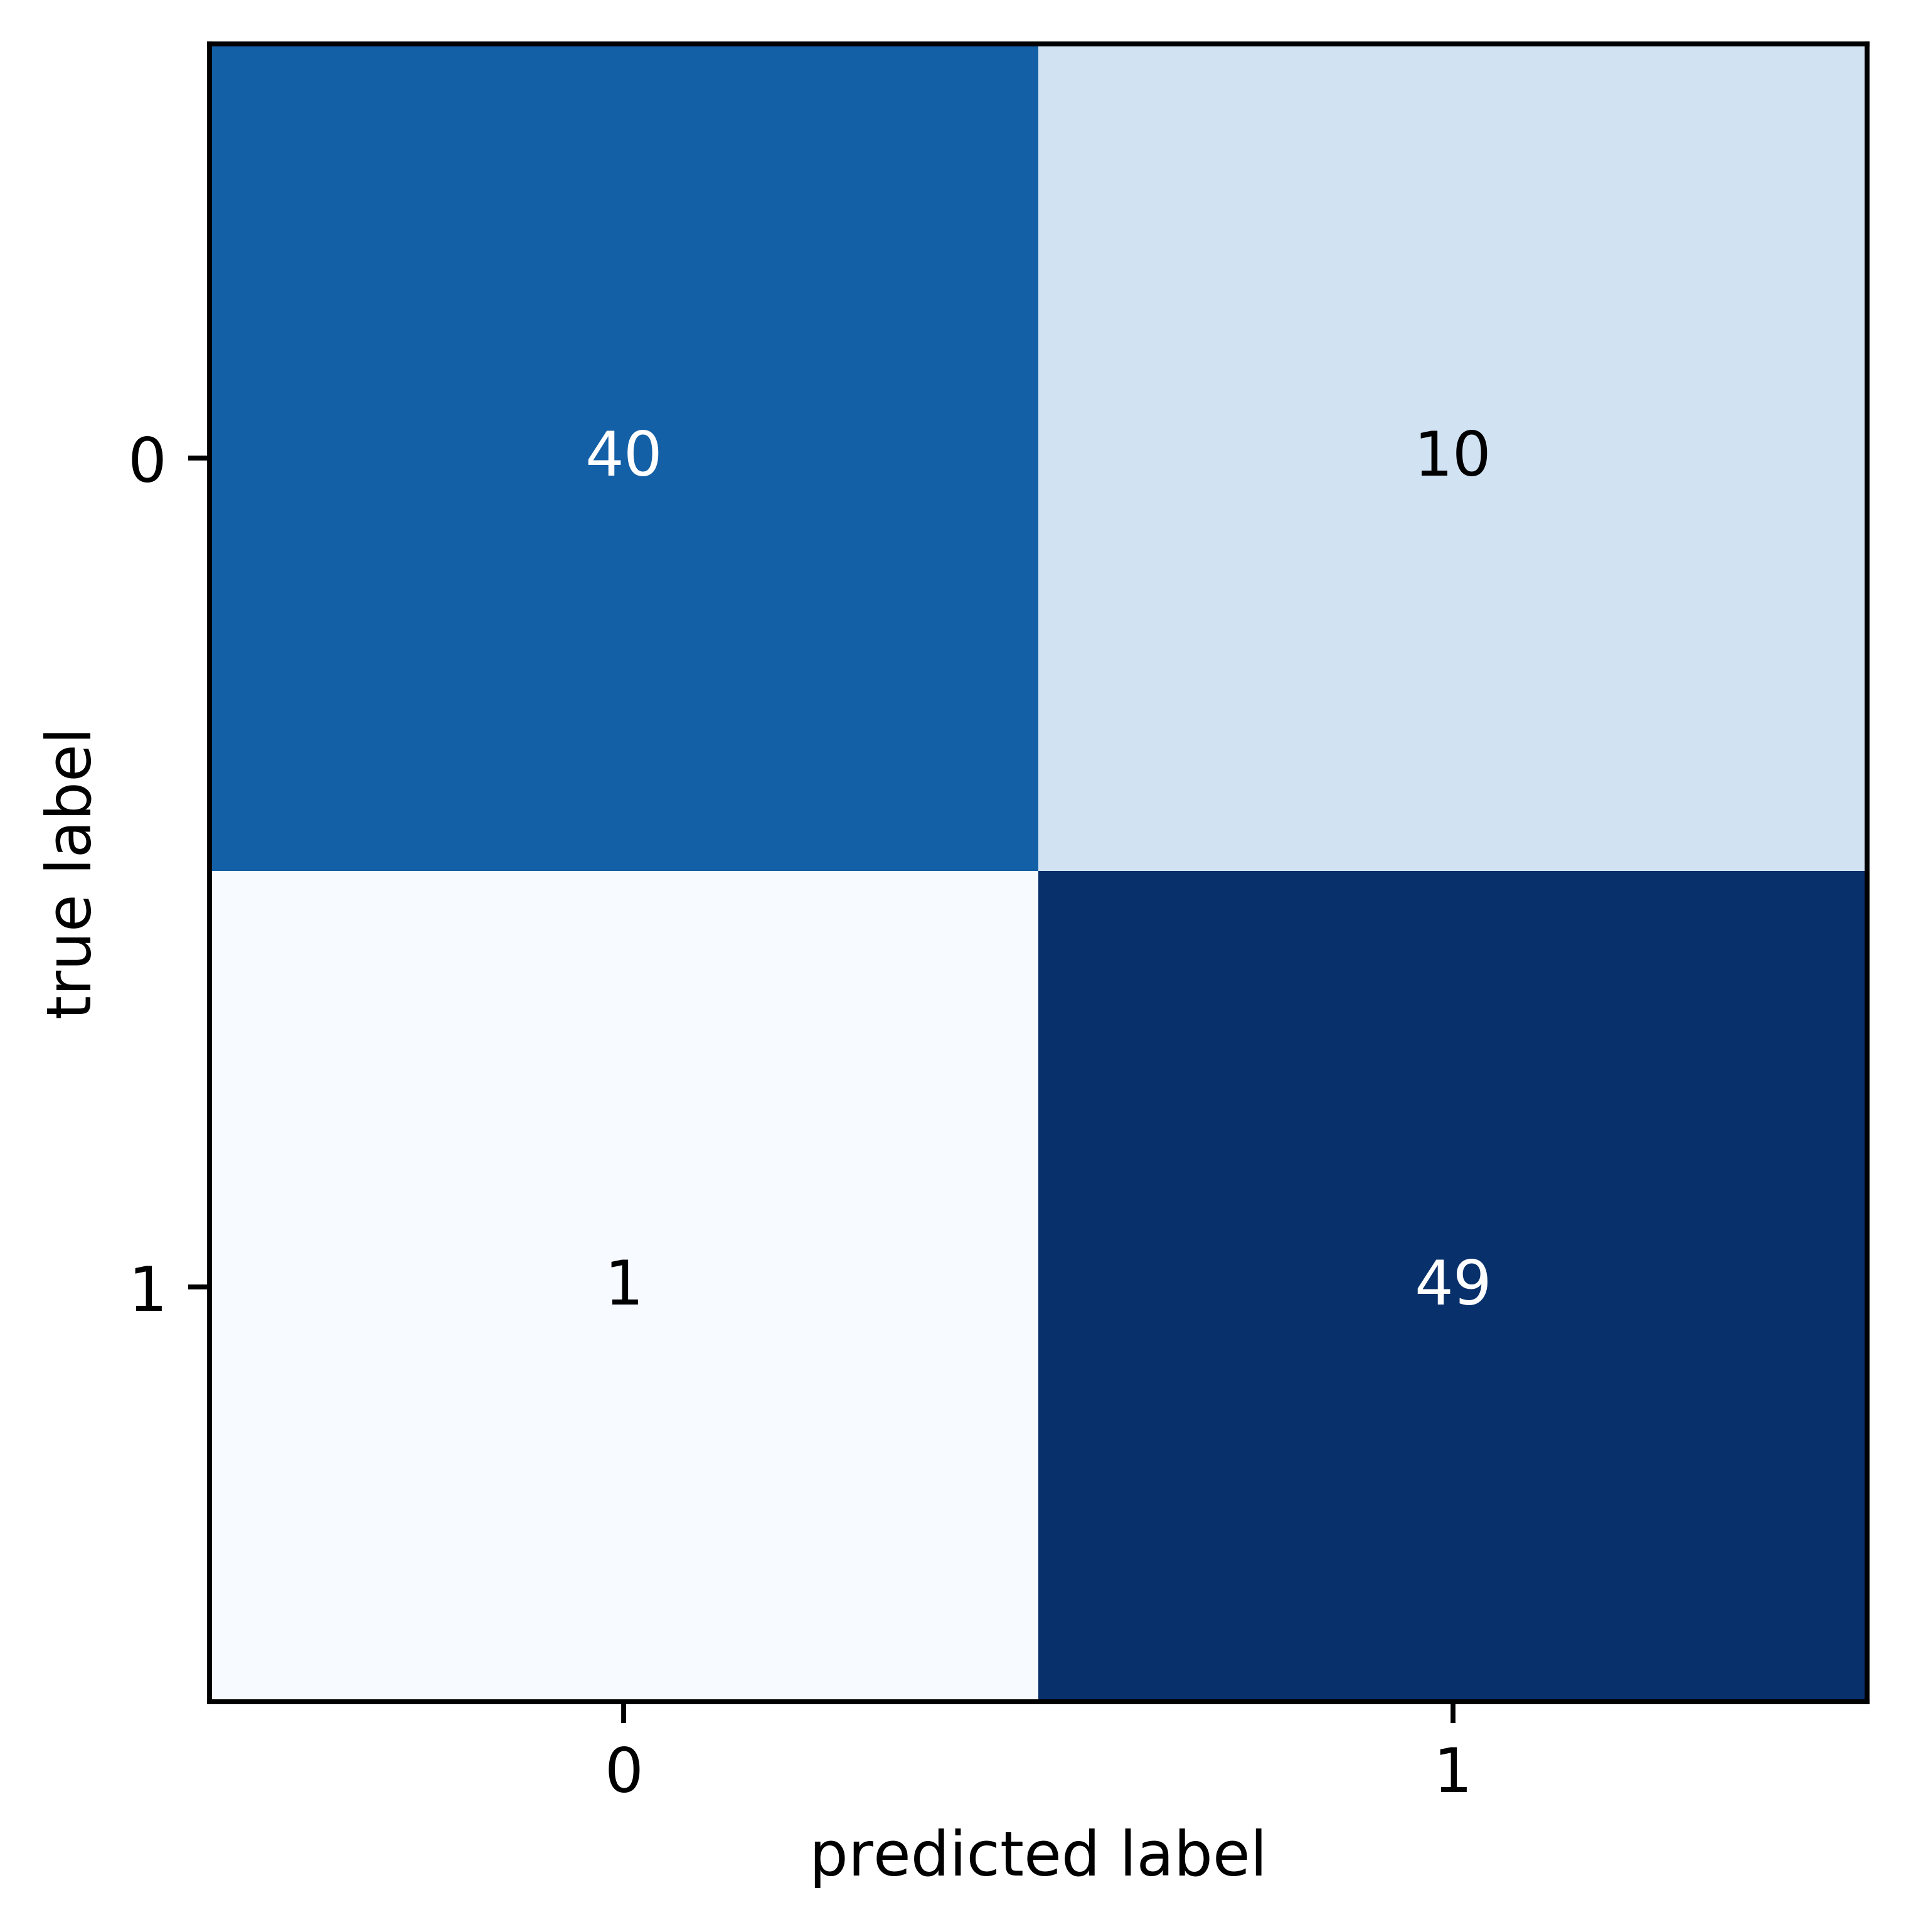

In [22]:
CM = confusion_matrix(val_y, predicted_class)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [19]:
pred = soo.g_best_pos_acc(val_features, val_y)

In [20]:
#Accuracy
pred

0.89

In [2]:
#Recall
49/(49+1)

0.98

In [4]:
#Precision
49/(49+10)

0.8305084745762712

### Saving best solution

In [25]:
try:
    f = open("solution.pickle", 'wb')
    save = {
      'solution': solution,
      }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', set_filename, ':', e)